CS210 Individual Project

Name: Abdulsamet Aktas 
ID  : 23811
All coments are related to the below cell of comment cells.

In the below cell i import necessary libraries which i will use next cells

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from math import radians, sin, cos, acos
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

i called my file as DataSet then i opened our dataset and print the beginning of my data

In [2]:
DataSet = pd.read_csv("taxi-trips.csv")
DataSet.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


It gives basic informantion about the datasets' shape. It prints number of rows and columns

In [3]:
NumberOfRows, NumberOfColumns = DataSet.shape
print ('number of rows: {}, number of columns: {}'.format(NumberOfRows, NumberOfColumns))

number of rows: 118185, number of columns: 11


Again this cell gives basic information about dataset such as columns name and their types

In [4]:
DataSet.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

It gives the detailed information about dataset. Also it helps us to understand and know more about our dataset

In [5]:
DataSet.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


We have longitude and latitude, we want to convert this numbers to location address. For that reason, we used reversed geocoder. I took the location address for pickup location. And i print it.

In [6]:
import reverse_geocoder as rg

List_xCor = DataSet["pickup_longitude"]
List_yCor = DataSet["pickup_latitude"]

PickupList = list(zip(List_yCor, List_xCor))
PickupResults = rg.search(PickupList)

print (PickupResults)


Loading formatted geocoded file...


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



I have the location address but we want to find name of this location and add this pickup names to our data as a new column named "pickup_district". On this cell i find the name of these locations and added to my dataset. Then i printed  all these places.

In [7]:
PickupName = []
for i in PickupResults:
    PickupName.append(i.get('name'))
DataSet['pickup_district'] = PickupName
print(DataSet['pickup_district'])


0                Manhattan
1         Long Island City
2                Weehawken
3                Manhattan
4            New York City
5                  Hoboken
6                Manhattan
7                Manhattan
8            New York City
9         Long Island City
10               Manhattan
11           New York City
12               Manhattan
13               Manhattan
14        Long Island City
15               Manhattan
16               Manhattan
17           New York City
18           New York City
19               Manhattan
20               Manhattan
21               Weehawken
22               Manhattan
23               Manhattan
24               Manhattan
25           New York City
26               Weehawken
27               Weehawken
28               Manhattan
29               Weehawken
                ...       
118155           Weehawken
118156           Manhattan
118157           Manhattan
118158           Manhattan
118159           Manhattan
118160           Manhattan
1

I did  the same process for the dropoff location. I used reverse geocoder to do this. 

In [8]:
List1_xCor = DataSet['dropoff_longitude']
List1_yCor = DataSet['dropoff_latitude']

DropoffList = list(zip(List1_yCor, List1_xCor))
DropoffResult = rg.search(DropoffList)

print (DropoffResult)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



We found the addresses for the dropoff locations but we want just name of these location. We found this locations and we add new column named "dropoff_district".

In [9]:
pickup_name1 = []
for i in DropoffResult:
    pickup_name1.append(i.get('name'))
DataSet['dropoff_district'] = pickup_name1
DataSet.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


Using appropriate formulas we found the top 5 pickup places.

In [10]:
top5_district_leave = DataSet.groupby(by="pickup_district")["pickup_district"].count().sort_values(ascending=False)[:5]
print(top5_district_leave)

pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


i printed the top 5 pickup places as a bar chart to see it cleary.

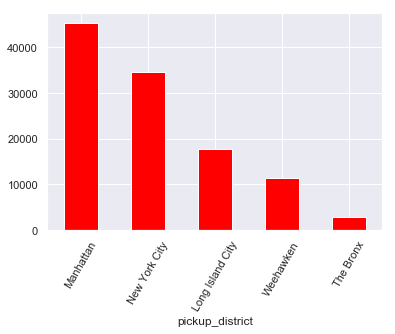

In [11]:
top5_district_leave.plot(kind="bar",
                   color="red",
                   rot=1500)

Using appropriate formulas we found the top 5 dropoff places.

In [12]:
top5_district_arrive = DataSet.groupby(by="dropoff_district")["dropoff_district"].count().sort_values(ascending=False)[:5]
print(top5_district_arrive)

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


I printed the top 5 dropoff places as a bar chart to see it cleary.

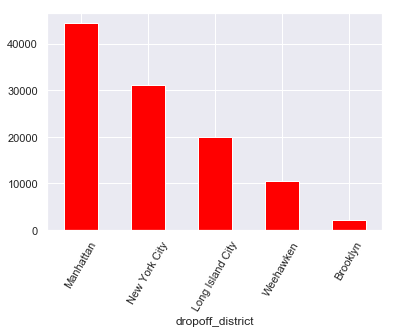

In [13]:
top5_district_arrive.plot(kind="bar",
                   color="red",
                   rot=1500)

Using geopy library we calculated the distance between the pickup location and dropoff location. Then we created new column which is called distance. To see what we did i printed small sample of our data with new added column.

In [14]:
from geopy import distance
DistList=[]
for i in range (len(PickupName)):
    j=(distance.great_circle(PickupList[i], DropoffList[i]).miles)
    DistList.append(j)
    
DataSet["distance"] = DistList
DataSet.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023


We took the datetime from our dataset and we take last part of this data and found the hour. Then we checked the hour is in which interval. Then we gave the appropriate name for all of these time intervals. Finally we create new column which is called time_of_day and we added to our dataset.

In [15]:
def DayAndTime(row):
    FindPickupTime = row["pickup_datetime"]
    HourMinSec = FindPickupTime[-8:]
    
    hour = int(HourMinSec[:2])
    
           
    if hour >= 0 and hour < 7:
        return "late_night"
    elif hour >= 7 and hour < 9:
        return "rush_hour_morning"
    elif hour >= 9 and hour < 16:
        return "afternoon"
    elif hour >= 16 and hour < 18:
        return "rush_hour_evening"
    elif hour >= 18 and hour < 23:
        return "evening"
    elif hour >= 23 and hour < 24:
        return "late_night"


DataSet['time_of_day'] = DataSet.apply(DayAndTime, axis=1)  

DataSet.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon


 To show how the average distance varies as time of the day changes, we created variables and we initialized these variables to 0. Then we calculated average distance according to time of day changes. Finally, i show that information via bar chart.
 As we can see there is some time of days have longer distance than others.

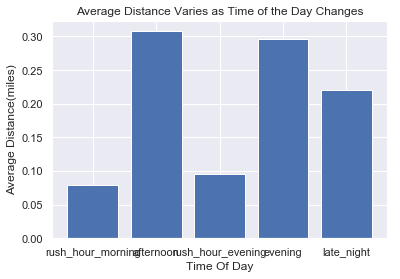

In [17]:
sum = 0.0
rush_Hour_Morning = 0.0
afternoon = 0.0
rush_Hour_Evening = 0.0
evening = 0.0
late_Night = 0.0
for _, row in DataSet.iterrows():
    dist = float(row['distance'])
    name = row["time_of_day"]
    sum += dist
    if name == "rush_hour_morning":
        rush_Hour_Morning += dist
    elif name == "afternoon":
        afternoon += dist
    elif name == "rush_hour_evening":
        rush_Hour_Evening += dist
    elif name == "evening":
        evening += dist
    elif name == "late_night":
        late_Night += dist

Data = {'rush_hour_morning': rush_Hour_Morning / sum, 'afternoon': afternoon / sum, 'rush_hour_evening': rush_Hour_Evening / sum, 'evening': evening / sum, 'late_night': late_Night / sum}
TimeInterval = list(Data.keys())
Values = list(Data.values())


plt.bar(TimeInterval, Values)
plt.ylabel("Average Distance(miles)")
plt.xlabel("Time Of Day")
plt.title("Average Distance Varies as Time of the Day Changes")
plt.show()

We did the same thing but this time for trip duration. We show the results on the bar chart. As we can see total trip duration in higher in afternoon and least in rush hour in the morning

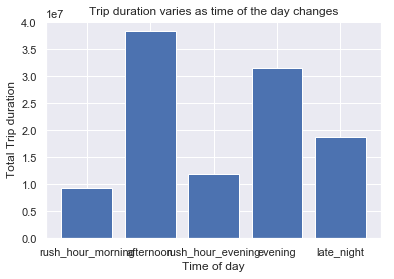

In [18]:
sum = 0.0
rush_Hour_Morning1 = 0.0
afternoon1 = 0.0
rush_Hour_Evening1 = 0.0
evening1 = 0.0
late_Night1 = 0.0
for _, row in DataSet.iterrows():
    tripDur = int(row['trip_duration'])
    name = row["time_of_day"]
    sum += tripDur
    if name == "rush_hour_morning":
        rush_Hour_Morning1 += tripDur
    elif name == "afternoon":
        afternoon1 += tripDur
    elif name == "rush_hour_evening":
        rush_Hour_Evening1 += tripDur
    elif name == "evening":
        evening1 += tripDur
    elif name == "late_night":
        late_Night1 += tripDur

Data1 = {'rush_hour_morning': rush_Hour_Morning1, 'afternoon': afternoon1, 'rush_hour_evening': rush_Hour_Evening1, 'evening': evening1, 'late_night': late_Night1}
TimeInterval1 = list(Data1.keys())
Values1 = list(Data1.values())

plt.bar(TimeInterval1, Values1)
plt.ylabel("Total Trip duration")
plt.xlabel("Time of day")
plt.title("Trip duration varies as time of the day changes")
plt.show()

I showed the relation between passenger count and distance mean. And to show it clearly i used bar chart.

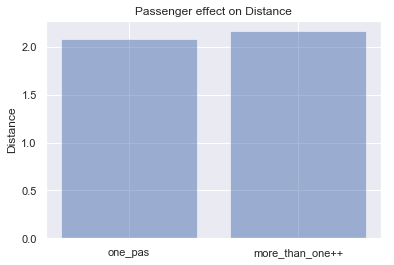

In [19]:
test_type = "distance"

oneTimePas = DataSet[DataSet["passenger_count"] == 1][test_type] 
moreThanOnePas = DataSet[DataSet["passenger_count"] > 1 ][test_type]    
mean_of_oneTimePas = oneTimePas.mean()
mean_of_moreThanOnePas = moreThanOnePas.mean()

objects = ('one_pas', 'more_than_one++')
y_pos = np.arange(len(objects))
perf = [mean_of_oneTimePas,mean_of_moreThanOnePas]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Passenger effect on Distance')

plt.show()

Since P-value smaller than 0.05 we reject null hypothesis so there is a correlation passenger count and distance.

In [20]:
stats.ttest_ind(oneTimePas, moreThanOnePas, equal_var=False)

Ttest_indResult(statistic=-4.906081908000875, pvalue=9.315200645357913e-07)

We divide days into two groups which is weekend and weekday. We will use this data next cell to find second null hypothesis. And i showed the beginning of what i did in this cell.

In [21]:
day = pd.to_datetime(DataSet["pickup_datetime"], infer_datetime_format=True)
theDay=day.dt.day_name()
array = []
for i in range (len(DataSet['id'])):
    if theDay[i] == "Sunday":
        Week = "weekend"
    elif theDay[i] == "Saturday":
        Week = "weekend"
    else:
        Week = "weekday"
    array.append(Week)
    
DataSet['DayOfWeek'] = array
print(DataSet['DayOfWeek'].head())

0    weekday
1    weekday
2    weekday
3    weekday
4    weekday
Name: DayOfWeek, dtype: object


I calculated relation between distance and weekday, weekend.  Than i showed the correlation bar chart.

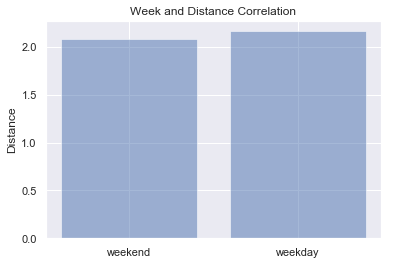

In [22]:
test_type = "distance"

weekendVariable = DataSet[DataSet["DayOfWeek"] == "weekend"][test_type] 
weekDayVariable = DataSet[DataSet["DayOfWeek"] == "weekday" ][test_type]    
weekend = oneTimePas.mean()
weekDay = moreThanOnePas.mean()

objects = ('weekend', 'weekday')
y_pos = np.arange(len(objects))
perf = [weekend,weekDay]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Week and Distance Correlation')

plt.show()

Since P-value is lower than 0.05 we reject null hypothesis again. Also there is a correlation between weekday and distance.

In [23]:
stats.ttest_ind(weekendVariable, weekDayVariable, equal_var=False)

Ttest_indResult(statistic=5.61921641810278, pvalue=1.9260544245367343e-08)

This is the end of the program.
Abdulsamet AKTAS
23811